In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import librosa as lb
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Handeling Class Imbalance

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
diagnosis=pd.read_csv('/content/drive/MyDrive/Classification-of-Lung-Sound/Respiratory_Sound_Database/patient_diagnosis.csv',names=['pid','disease'])
diagnosis.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


* In the following plot we can see that classes are **imbalanced** so we must split them into train and validation set via stratify

<ipython-input-5-6cf58ec36af8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')


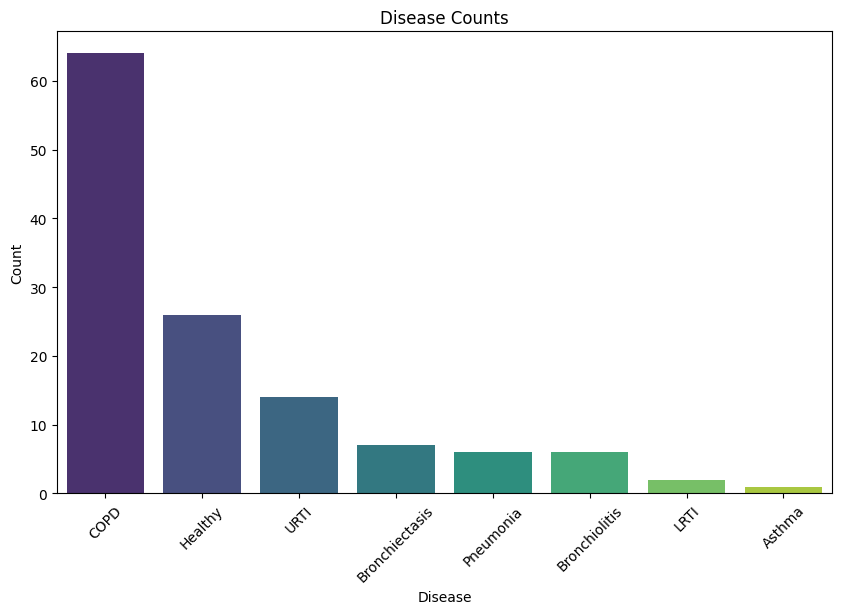

In [5]:
df = diagnosis

# Count the occurrences of each category in the 'disease' column
disease_counts = df['disease'].value_counts()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Disease Counts')
plt.xticks(rotation=45)
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'URTI'),
  Text(1, 0, 'Healthy'),
  Text(2, 0, 'Asthma'),
  Text(3, 0, 'COPD'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

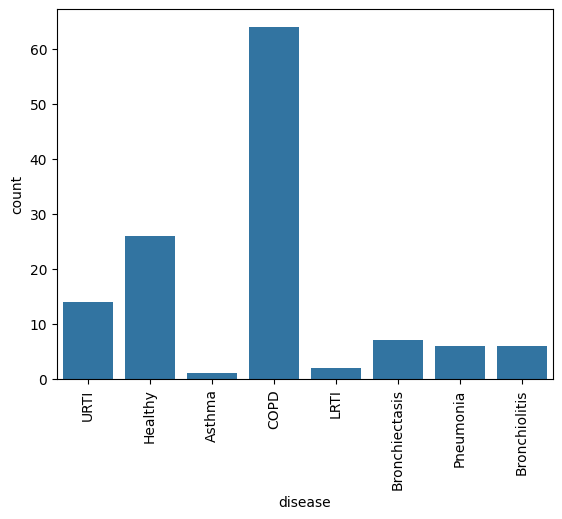

In [4]:

sns.countplot(x='disease', data=diagnosis)

plt.xticks(rotation=90)

> We will try to extract **Id** of each processed audio file and then merge them with their respective **class label** so we can split files in to train and validation folder in **stratified manner**

In [ ]:
import os
def extractId(filename):
    return filename.split('_')[0]

In [ ]:
path='/content/drive/MyDrive/Classification-of-Lung-Sound/processed_audio_files/'
length=len(os.listdir(path))
index=range(length)
i=0
files_df=pd.DataFrame(index=index,columns=['pid','filename'])
for f in os.listdir(path):
    files_df.iloc[i]['pid']=extractId(f)
    files_df.iloc[i]['filename']=f
    i+=1
files_df.head()

In [ ]:
files_df.pid=files_df.pid.astype('int64') # both pid's must be of same dtype for them to merge

In [ ]:
data=pd.merge(files_df,diagnosis,on='pid')
data.head()

In [ ]:
sns.countplot(x = 'disease' , data = data)
plt.xticks(rotation=90)

> We can see that classes are very **skewed**

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

* Above i used the **stratify** arg of **train_test_split** and set it to disease to stratify data based on **class labels**

In [ ]:
Xtrain.disease.value_counts()/Xtrain.shape[0]

In [ ]:
Xval.disease.value_counts()/Xval.shape[0]

> % of class labels in same in both train and val as we can see above

* We did this because this will help our model to **learn and validate classes** , it will not be like we are training only on COPD disease and there is no COPD in our validation

# Visualizing MFCCS

> I have used one file as an example here.

In [ ]:
path='/content/drive/MyDrive/Classification-of-Lung-Sound/processed_audio_files/'

import librosa.display
file=path + Xtrain.iloc[193].filename
sound,sample_rate=lb.load(file)
mfccs = lb.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

* Here I am going to output **train & test datasets** so that i can use the **filenames** in then in another notebook where i will try other **feature extraction** methods inclusive of MFCC's and adopt the one or many based on **performance**.

In [ ]:
Xtrain.to_csv('/content/drive/MyDrive/Classification-of-Lung-Sound/train.csv')
Xval.to_csv('/content/drive/MyDrive/Classification-of-Lung-Sound/val.csv')